<a href="https://colab.research.google.com/github/MatthewFried/DAV-5400/blob/master/M_Fried_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DAV6150 Project 1**#
> **Regression for Numeric Data**

In this project we will apply the full data science project lifecycle to the implementation of a regression model. We will initially include an EDA, data preparation (including transforms as needed), feature selection, and a thorough evaluation of model performance metrics. The response variable we will be modeling is the data set’s “TARGET” attribute, which represents the number of cases of wine that were purchased by wine distributors subsequent to their sampling each of the wines. 

Sample cases of wine are used to provide tasting samples to wine shops and restaurants throughout the USA. We will assist a large
wine producer with the development of a model that can predict the number of wine cases ordered by distributors based on the various characteristics of the many wines represented in the data set, with respect to the wine producer's desire to understand ways in which their wine offerings can be adjusted to maximize wine sales. Thus, we wil construct a series of regression models that predict the number of wine cases sold relative to certain properties and characteristics of the wine, as explained below. We will then evaluate these models and make a recommendation.
In short, the steps we will take are: 
1. EDA modeling
2. Data preparation work
3. Feature selection and/or dimensionality reduction
4. Construct at least two different Poisson regression models, at least
two different negative binomial regression models, and at least two multiple linear regression models, using different explanatory variables (or the same variables if they have been transformed via different
transformation methods). 
5. Model selection, cross validation, metrics, and assessment against the Project1 evaluation data set




##**Wine Characteristics**##

**Index** - This is a unique ID/label given to every wine in our dataset.

**Target** - This is the response variable, which, in our case, is the goal to model effectively, which is, number of cases sold.

**Fixed Acidity** - The main fixed acids in wines are tartaric, malic, citric, and succinic. The levels of the above found in wine can vary, but normal levels are listed below [this link](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity):
- 1 to 4 g/L tartaric acid
- 0 to 8 g/L malic acid
- 0 to 0.5 g/L citric acid
- 0.5 to 2 g/L succinic acid
- 1.5 to 14.5 g/L when added up

**Volatile Acidity** - This is a measure of a wine's volatile acids, as the name implies. Acetic acid is the primary volatile acid.  Volatile acidity concentration is regulated by the Federal Tax and Trade Bureau, the maximum volatile acidity according to [this link](https://extension.psu.edu/volatile-acidity-in-wine#:~:text=Volatile%20acidity%20(VA)%20is%20a%20measure%20of%20the%20wine's%20volatile,smell%20and%20taste%20of%20vinegar.) is:
- 1.4 g/L for red wine 
- 1.2 g/L for white wine

**Citric Acid** - This is a weak organic acid. It naturally occurs in citrus fruits, hence the name. It is also one of the acids that are part of the larger category of Fixed Acidity.   

**Residual Sugar** - This is the left over sugar in wine. One of the many physical attributes that can be seen at different stages of the wine making process. According to [this link](http://www.moundtop.com/pdf/Winemaking-ResidualSugar.pdf),it has a range from 1-2g/L up to 100-200g/L depending on the type of wine. 

**Chlorides** - This is a contributor to the saltiness of wines and can contain 2 to 4 g/L of mineral acids, alongside some organic acids.  Information can be had at the following [link](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0101-20612015000100095#:~:text=Wine%20contains%20from%202%20to,2003%3B%20Maltman%2C%202013).  

**Free Sulfur Dioxide** - This category (FSO2) and the pH of a wine determine how much sulfur dioxide is in the molecular form. This helps protect the wine from oxidation and spoilage.

**Total Sulfur Dioxide** - This category is the portion of SO2 that is free added to the portion that is bound to other chemicals such as aldehydes, pigments, or sugars. The total sulfur dioxide level is also regulated by the federal agency for Alcohol and Tobacco Tax and Trade Bureau (TTB). The maximum allowable concentration for a bottled wine according to [this link](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too) is: 350 ppm (mg/L) of total sulfur dioxide.

**Density** - [This link](https://chemwine.com/home/why-is-wine-density-important-1-sl6yl/) provides a formula to estimate a wine’s density.  While [this link](https://www.aqua-calc.com/page/density-table/substance/alcoholic-blank-beverage-coma-and-blank-wine-coma-and-blank-table-coma-and-blank-red) shows that the density can vary from wine to wine, from a cursory look through said websites chart, we expect the average density to be around 1.

**pH** - The pH levels in wine can vary according to different wine types. For instance, some may generally fall between 3 and 4, while others may be in the 2 range.  [This link](https://daily.sevenfifty.com/how-winemakers-analyze-ph-and-its-impact-on-wine/) describes how one analyzes the pH of wines.

**Sulphates** - Sulphates in can range from around 0.15g/L up to 0.3g/L, these numbers are based on [this link](http://blog.lastbottlewines.com/education/sulphites/).

**Alcohol** - Alchohol content can range from 5.5% to 23% ABV, with some wines having no alcohol content at all. 
[This link](https://winefolly.com/tips/the-lightest-to-the-strongest-wine/) provides more detailed information regarding different types of wine and their Alcohol content. 

**Label Appeal** - This is a subjective level based on various wine experts gauging the appeal.

**Acid Index** - The general approach to the acid index is created by taking the pH and subtracting it from the Total Acidity, via [this link](http://www.bcawa.ca/winemaking/acidph.htm). However, our metric is the total acidity of wine via a weighted average, due to information we are given about the data set.  

**STARS** - This is a wine rating as determined by experts (4 = excellent; 1 = Poor).








##**Initial Exploratory Data Analysis**##


In [ ]:
# load pandas and numpy libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection,preprocessing)
from sklearn.dummy import DummyRegressor

# load the entire dataset from a file uploaded to my GitHub repo
df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/DAV6150/master/M3_Data.csv")

#create a second stored value of original data as a safety
df_orignal = df

# check the dataset uploaded as expected
print("Observations: {}".format(df.shape[0]))
df.head()

Observations: 12795


INDEX  TARGET  FixedAcidity  ...  LabelAppeal  AcidIndex  STARS
0      1       3           3.2  ...            0          8    2.0
1      2       3           4.5  ...           -1          7    3.0
2      4       5           7.1  ...           -1          8    3.0
3      5       3           5.7  ...           -1          6    1.0
4      6       4           8.0  ...            0          9    2.0

[5 rows x 16 columns]

In [ ]:
# display column names, datatype, and non-null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

In [ ]:
# check the number of unique values per variable
df.nunique(axis=0)

INDEX                 12795
TARGET                    9
FixedAcidity            470
VolatileAcidity         815
CitricAcid              602
ResidualSugar          2077
Chlorides              1663
FreeSulfurDioxide       999
TotalSulfurDioxide     1370
Density                5933
pH                      497
Sulphates               630
Alcohol                 401
LabelAppeal               5
AcidIndex                14
STARS                     4
dtype: int64

From the above we note which columns may be more suitable for binning or other techniques, as they are continuous variables.

In [ ]:
# statistical summary of numeric variables:
df.describe().T

count         mean  ...           75%          max
INDEX               12795.0  8069.980305  ...  12106.500000  16129.00000
TARGET              12795.0     3.029074  ...      4.000000      8.00000
FixedAcidity        12795.0     7.075717  ...      9.500000     34.40000
VolatileAcidity     12795.0     0.324104  ...      0.640000      3.68000
CitricAcid          12795.0     0.308413  ...      0.580000      3.86000
ResidualSugar       12179.0     5.418733  ...     15.900000    141.15000
Chlorides           12157.0     0.054822  ...      0.153000      1.35100
FreeSulfurDioxide   12148.0    30.845571  ...     70.000000    623.00000
TotalSulfurDioxide  12113.0   120.714233  ...    208.000000   1057.00000
Density             12795.0     0.994203  ...      1.000515      1.09924
pH                  12400.0     3.207628  ...      3.470000      6.13000
Sulphates           11585.0     0.527112  ...      0.860000      4.24000
Alcohol             12142.0    10.489236  ...     12.400000     26.50000
LabelAppeal         12795.0    -0.009066  ...      1.000000      2.00000
AcidIndex           12795.0     7.772724  ...      8.000000     17.00000
STARS                9436.0     2.041755  ...      3.000000      4.00000

[16 rows x 8 columns]

The above let's us see that several columns have negative values, all of which, according to our above analysis should not exist. We can approach this in several ways: 
1. We could take the absolute value of a column
2. We could use a shift to ensure all values are positive
3. Or we could delete rows/columns if there is other corroborating evidence that there is a broader mistake.

Below we run code to count the number of negative values

In [ ]:
#Count how many are negative to check if it was pre-standardized
#We see that is highly unlikely
a = df.loc[df.FixedAcidity < 0, 'FixedAcidity'].count()
print('Fixed Acid: ', a)
b = df.loc[df.VolatileAcidity < 0, 'VolatileAcidity'].count()
print('Volatile Acidity: ',b)
c = df.loc[df.CitricAcid < 0, 'CitricAcid'].count()
print('Citric Acid: ', c)
d = df.loc[df.ResidualSugar < 0, 'ResidualSugar'].count()
print('Residual Sugar: ', d)
e = df.loc[df.Chlorides < 0, 'Chlorides'].count()
print('Chlorides: ', e)
f = df.loc[df.FreeSulfurDioxide < 0, 'FreeSulfurDioxide'].count()
print('Free Sulfur Dioxide: ', f)
g = df.loc[df.TotalSulfurDioxide < 0, 'TotalSulfurDioxide'].count()
print('Total Sulfur Dioxide: ', g)
h = df.loc[df.Sulphates < 0, 'Sulphates'].count()
print('Sulphates: ', h)
i = df.loc[df.Alcohol < 0, 'Alcohol'].count()
print('Alcohol: ', i)


Fixed Acid:  1621
Volatile Acidity:  2827
Citric Acid:  2966
Residual Sugar:  3136
Chlorides:  3197
Free Sulfur Dioxide:  3036
Total Sulfur Dioxide:  2504
Sulphates:  2361
Alcohol:  118


In [ ]:
# check the dataset for null values
df.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

Here we are checking the number of null values. Below we chart the values looking for patterns.

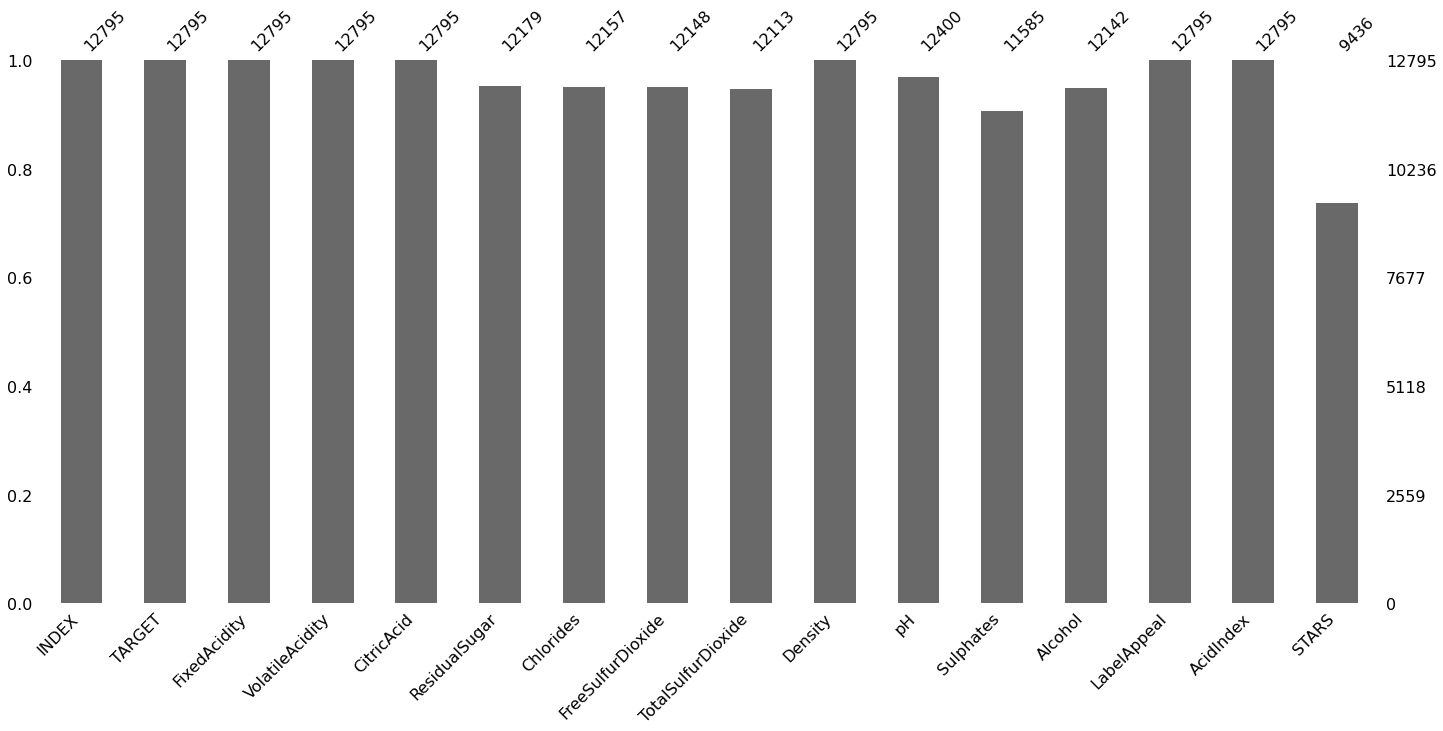

In [ ]:
#visualize the amount of missing data using missingno's bar chart
msno.bar(df);

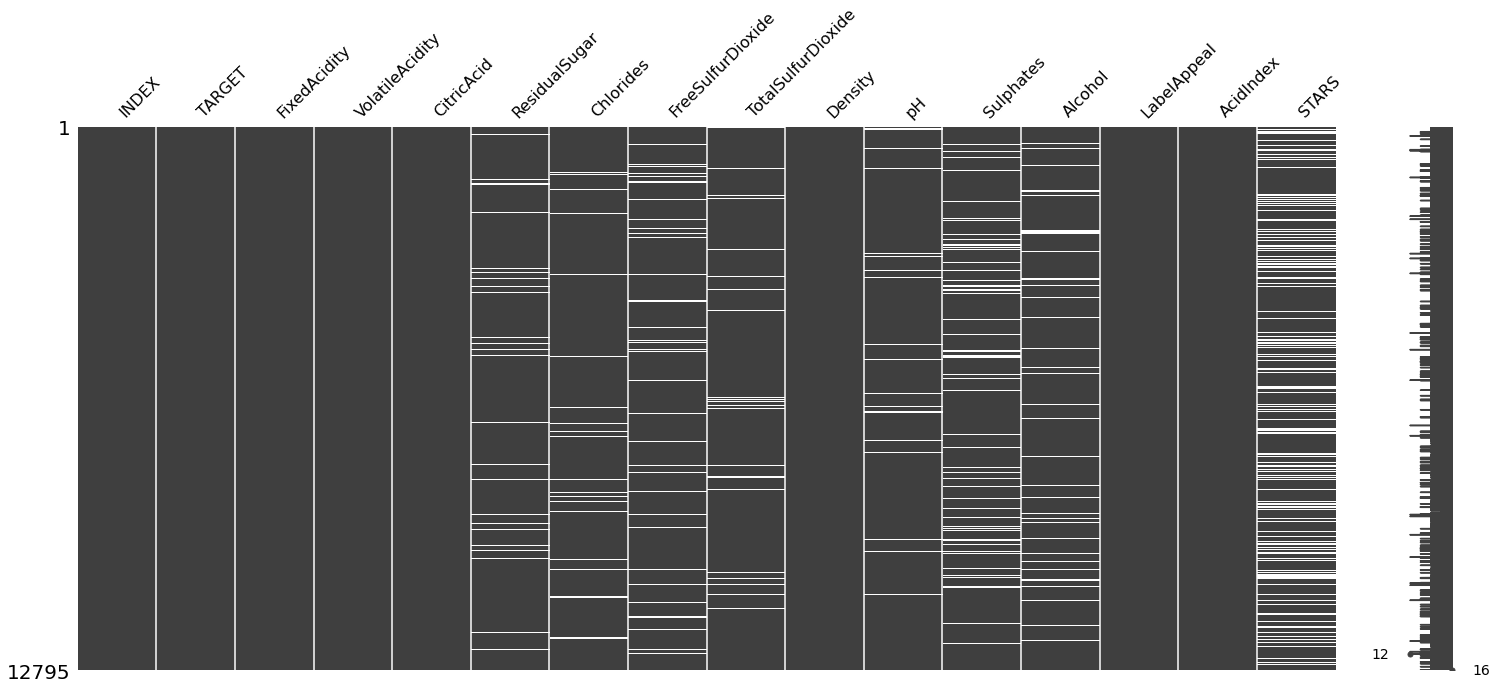

In [ ]:
#use missingnos matrix to see if there is a pattern to the missing data
ax2 = msno.matrix(df)
ax2.get_figure();

##**Correlation**##

Below we analyze the correlation matrix. We chart it as well, looking for any abnormalities that jump out at us.

In [ ]:
# view correlation matrix for the variables in the dataset
corrMatrix = df.corr()
corrMatrix

INDEX    TARGET  ...  AcidIndex     STARS
INDEX               1.000000  0.001256  ...  -0.007097  0.000194
TARGET              0.001256  1.000000  ...  -0.246049  0.558794
FixedAcidity        0.001133 -0.049011  ...   0.178437 -0.006628
VolatileAcidity    -0.010224 -0.088793  ...   0.044642 -0.034431
CitricAcid          0.004922  0.008685  ...   0.065697  0.000665
ResidualSugar       0.003846  0.016491  ...  -0.009414  0.016741
Chlorides           0.002966 -0.038263  ...   0.025238 -0.004931
FreeSulfurDioxide   0.009257  0.043824  ...  -0.041717 -0.009082
TotalSulfurDioxide  0.010756  0.051478  ...  -0.049311  0.013929
Density            -0.010779 -0.035518  ...   0.040413 -0.018284
pH                 -0.005853 -0.009445  ...  -0.058676 -0.000488
Sulphates           0.006413 -0.038850  ...   0.034449 -0.012306
Alcohol            -0.007677  0.062062  ...  -0.038138  0.065220
LabelAppeal         0.011553  0.356500  ...   0.024755  0.334788
AcidIndex          -0.007097 -0.246049  ...   1.000000 -0.086259
STARS               0.000194  0.558794  ...  -0.086259  1.000000

[16 rows x 16 columns]

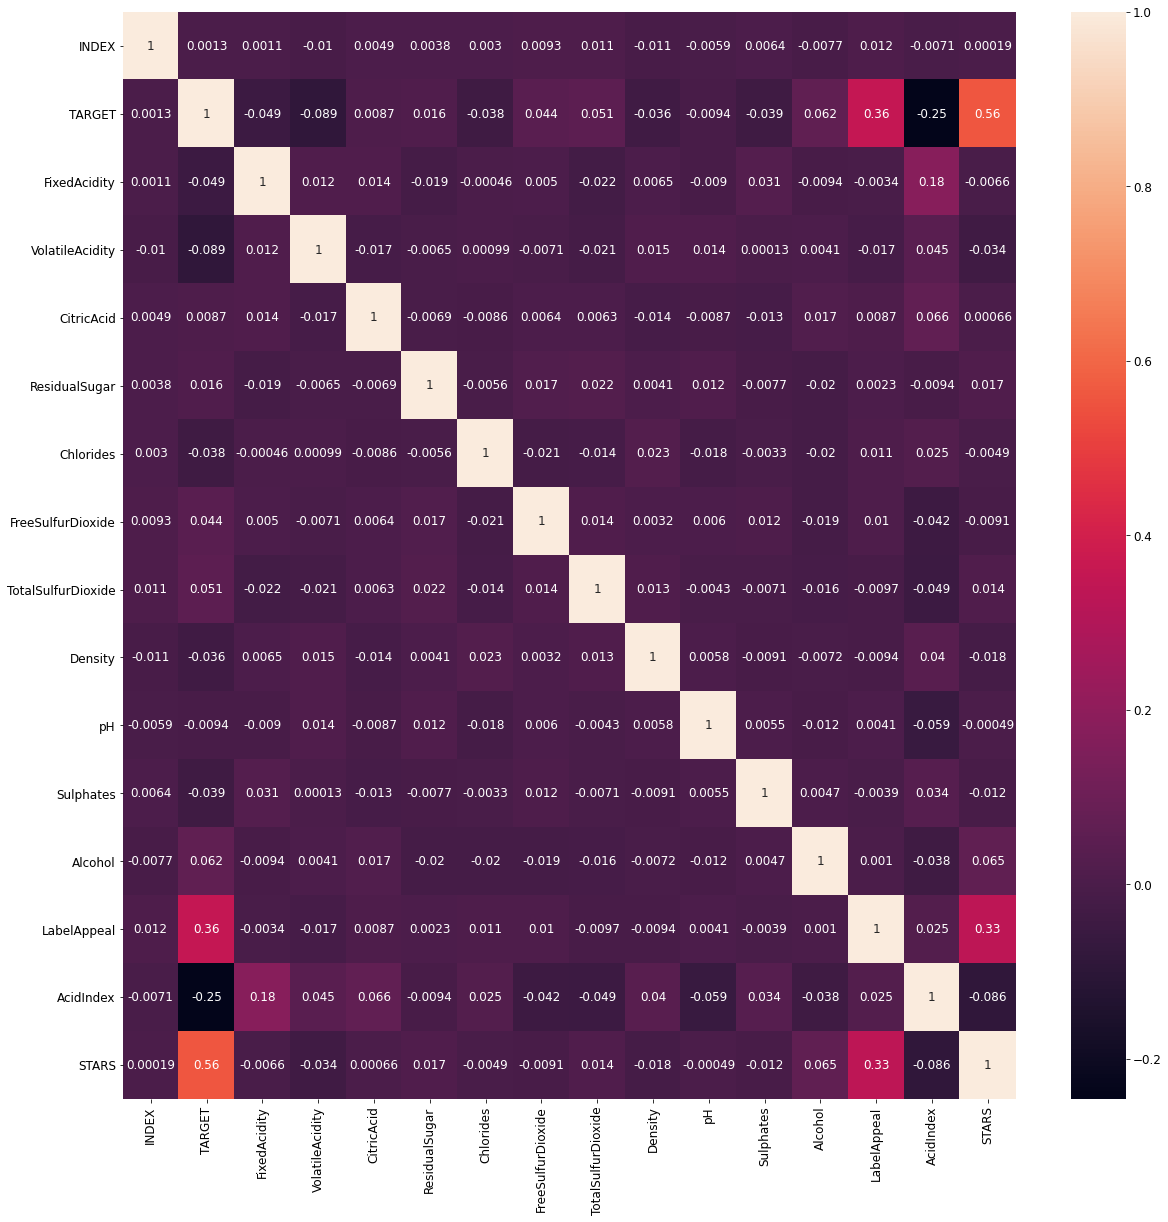

In [ ]:
# show visual representation of the correlation matrix
plt.rcParams.update({'font.size': 12,'figure.figsize':(20,20)})
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show() # show plot

###**Multicollinearity Analysis**###
We note here that the columns with the most missing data ("Stars" and "Sulphates") do not have a high enough correlation with any other column that would suggest we get rid of them.  If there were enough collinearity than we could suggest getting rid of a column that is missing a large amount of data, such as Stars - but it is highly correlated with nothing else but our target, so we will hold off on getting rid of it.  In fact, none of the columns have a collinearity greater than our threshold of .75, as such, we will not do the dimensionality reduction based on this alone.

##**Histograms and Scatterplots**##

Below we look at the data in terms of histograms and scatterplots to see if there are any major points that we can identify in terms of the distribution.

If one were to scroll down and look at the below charts, one will note that the data does not look homoskedastic and that most of the probability distributions are have a lower standard deviaton than a normal chart does. In other words, the kurtosis is relatively high, which may indicate this is a different type of distribution.

<Figure size 1440x1440 with 0 Axes>

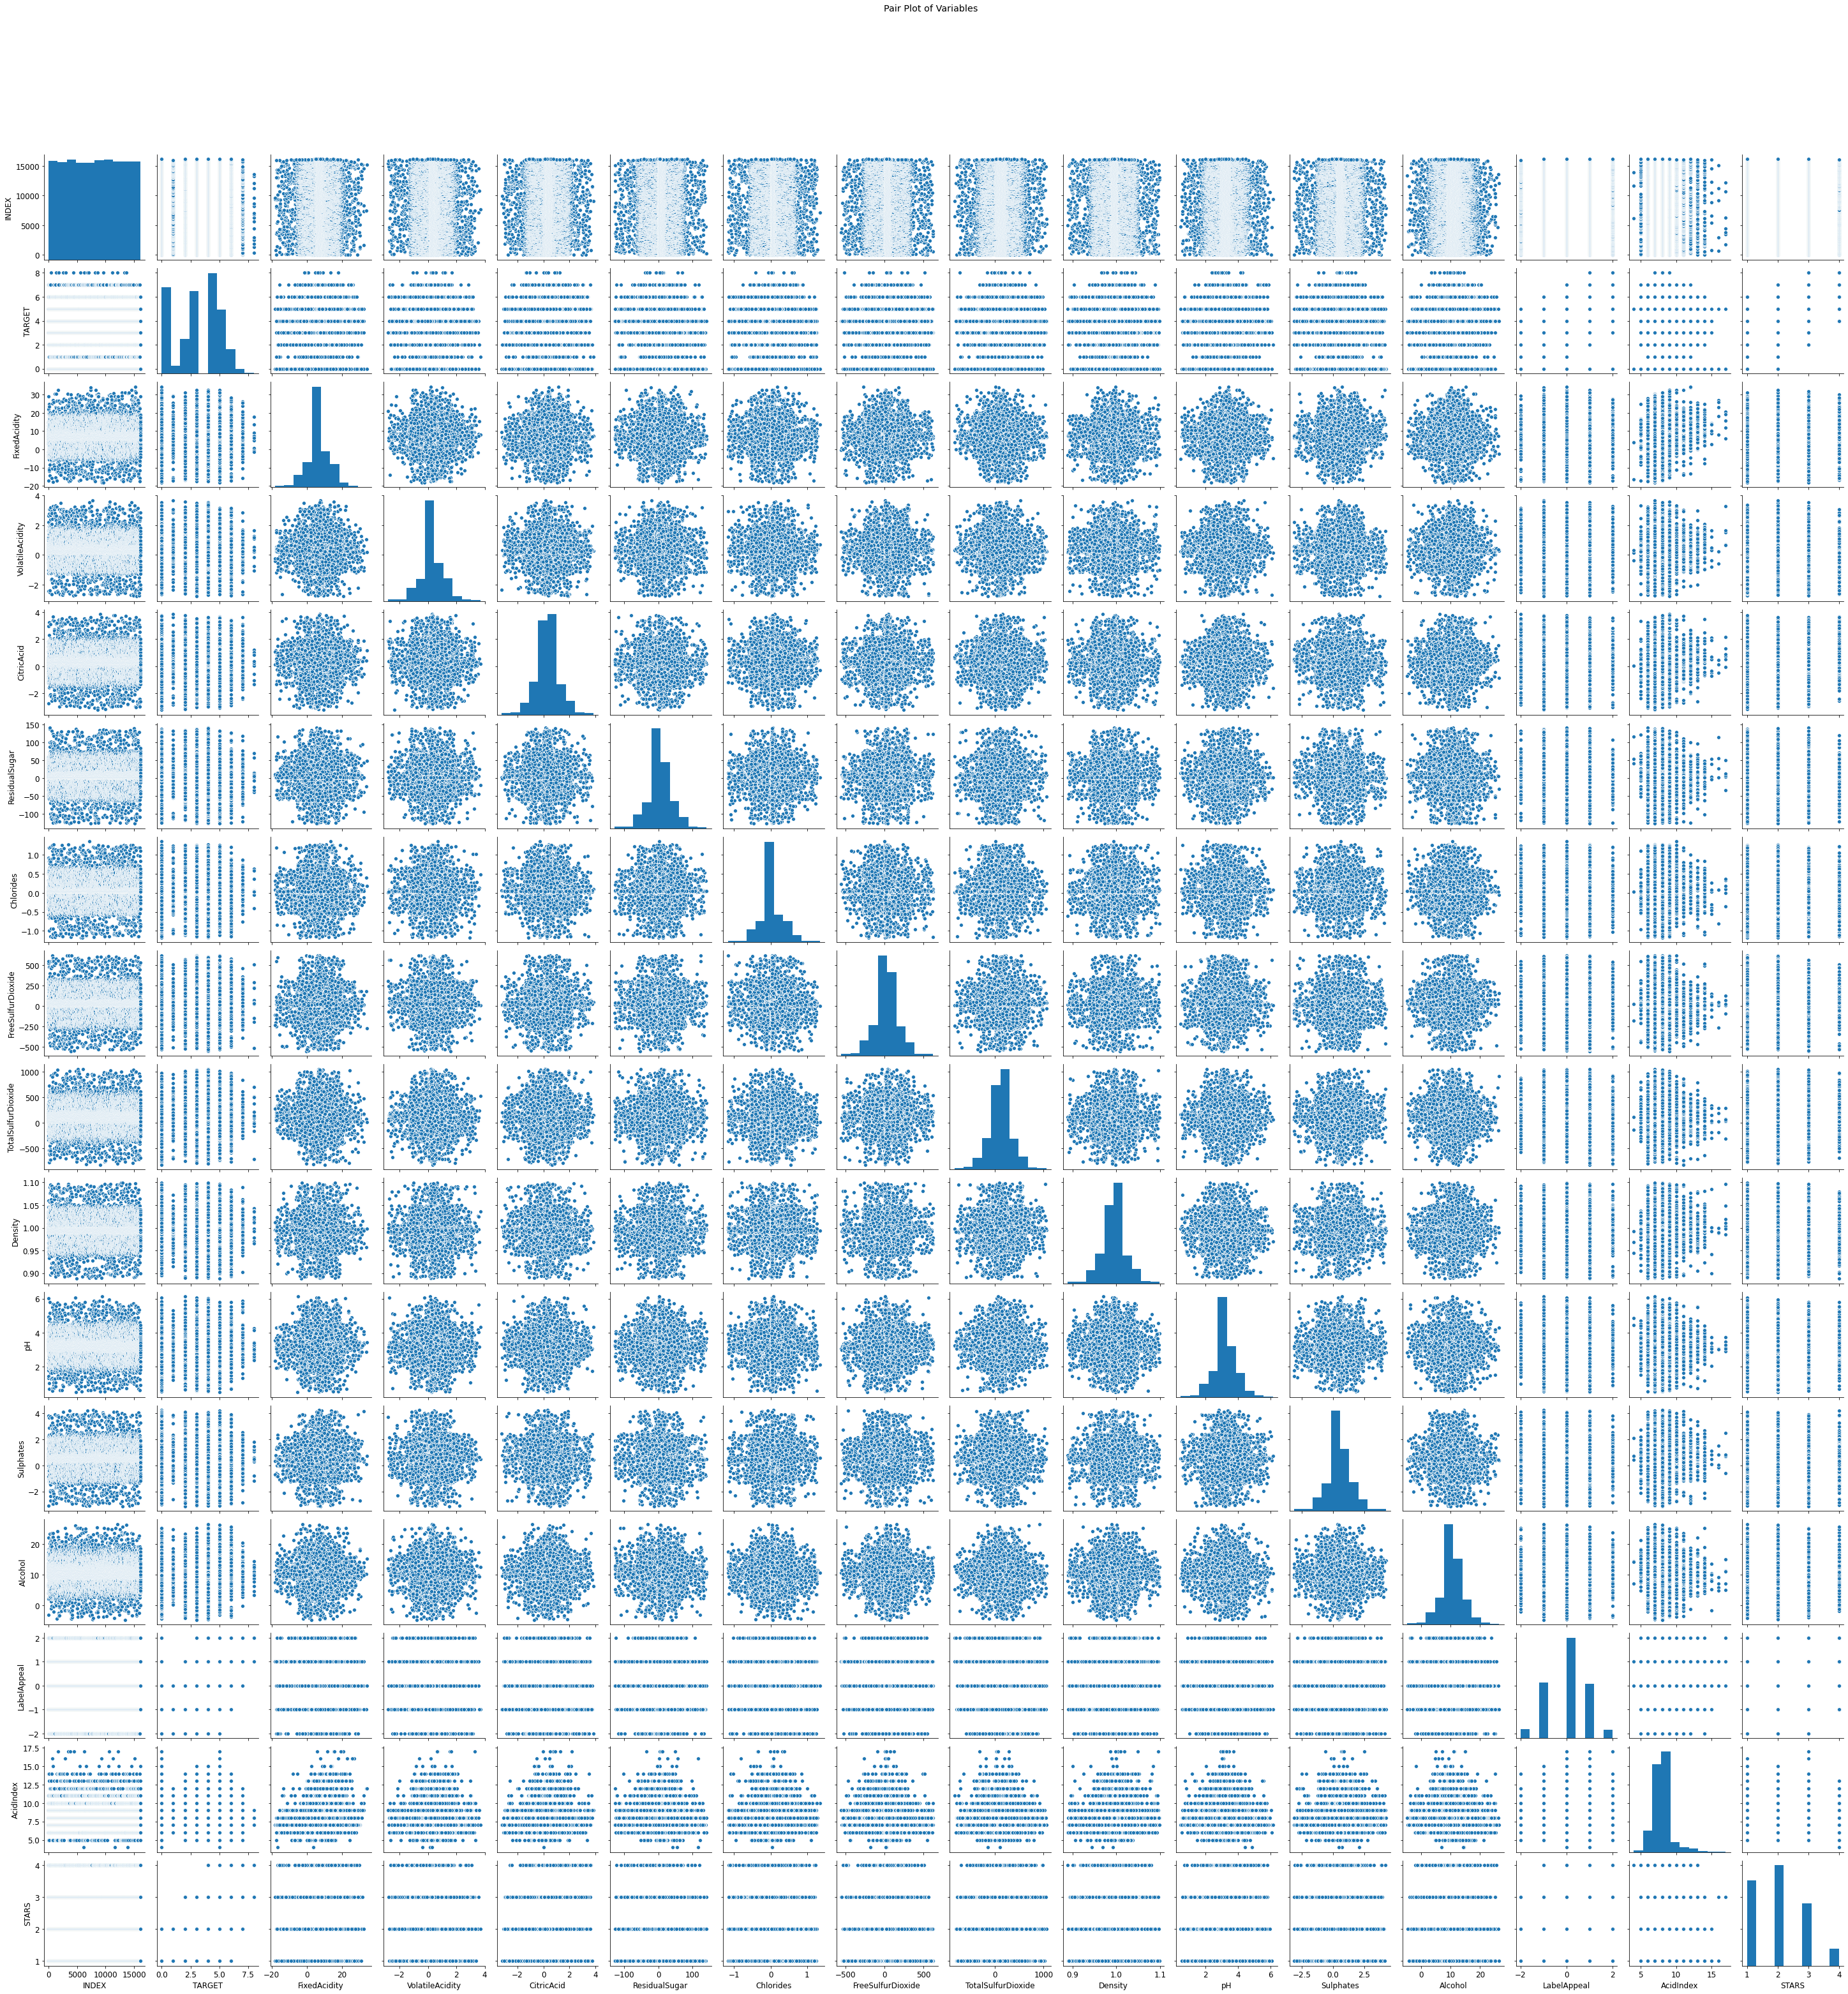

In [ ]:
# Create a pairplot to spot any abnormalities we should be aware of in the scatterplot
fig2 = plt.figure() #define the figure
g = sns.pairplot(df) #define what plot to use and what data to look at
g.fig.suptitle("Pair Plot of Variables", y=1.08) # set the title with y= some height>1 so it appears on top
plt.show() #display results

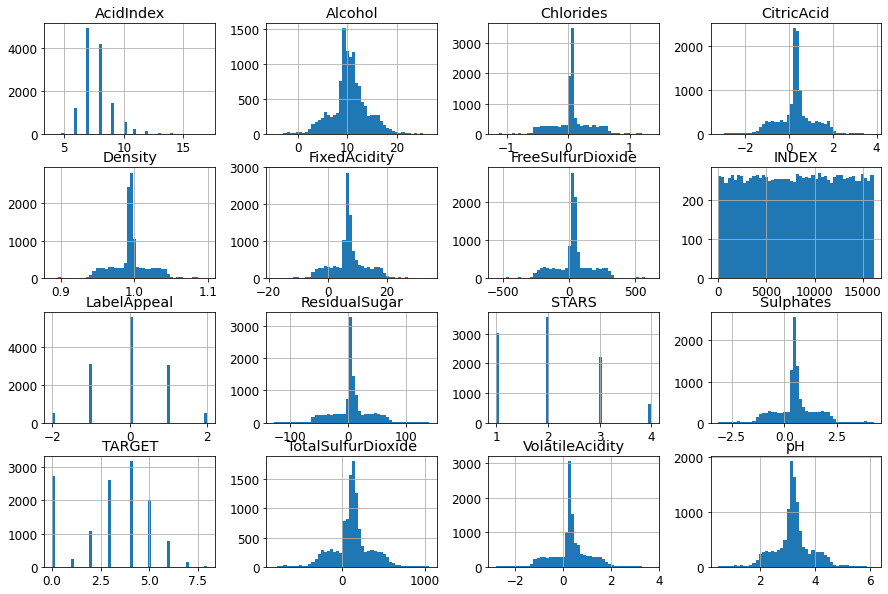

In [ ]:
#histograms
df.hist(bins=50, figsize=(15,10))
plt.show()

##**Boxplots**##

While the boxplots do give us a good reason to look at some of the values that seem to be far out of regular bounds (such as in the 95th percentile), we will NOT drop these values as our rich understanding of the subject matter allows us to entertain reasonable assumptions as to what is causing this distribution. For instance, the Residual Sugar may have some outliers, but it is not altogether that strange since ice wines often have signficantly higher levels of sugar than other wines, so much so, that a couple of them in the mix would *look* like an aberration, but is in fact not one.

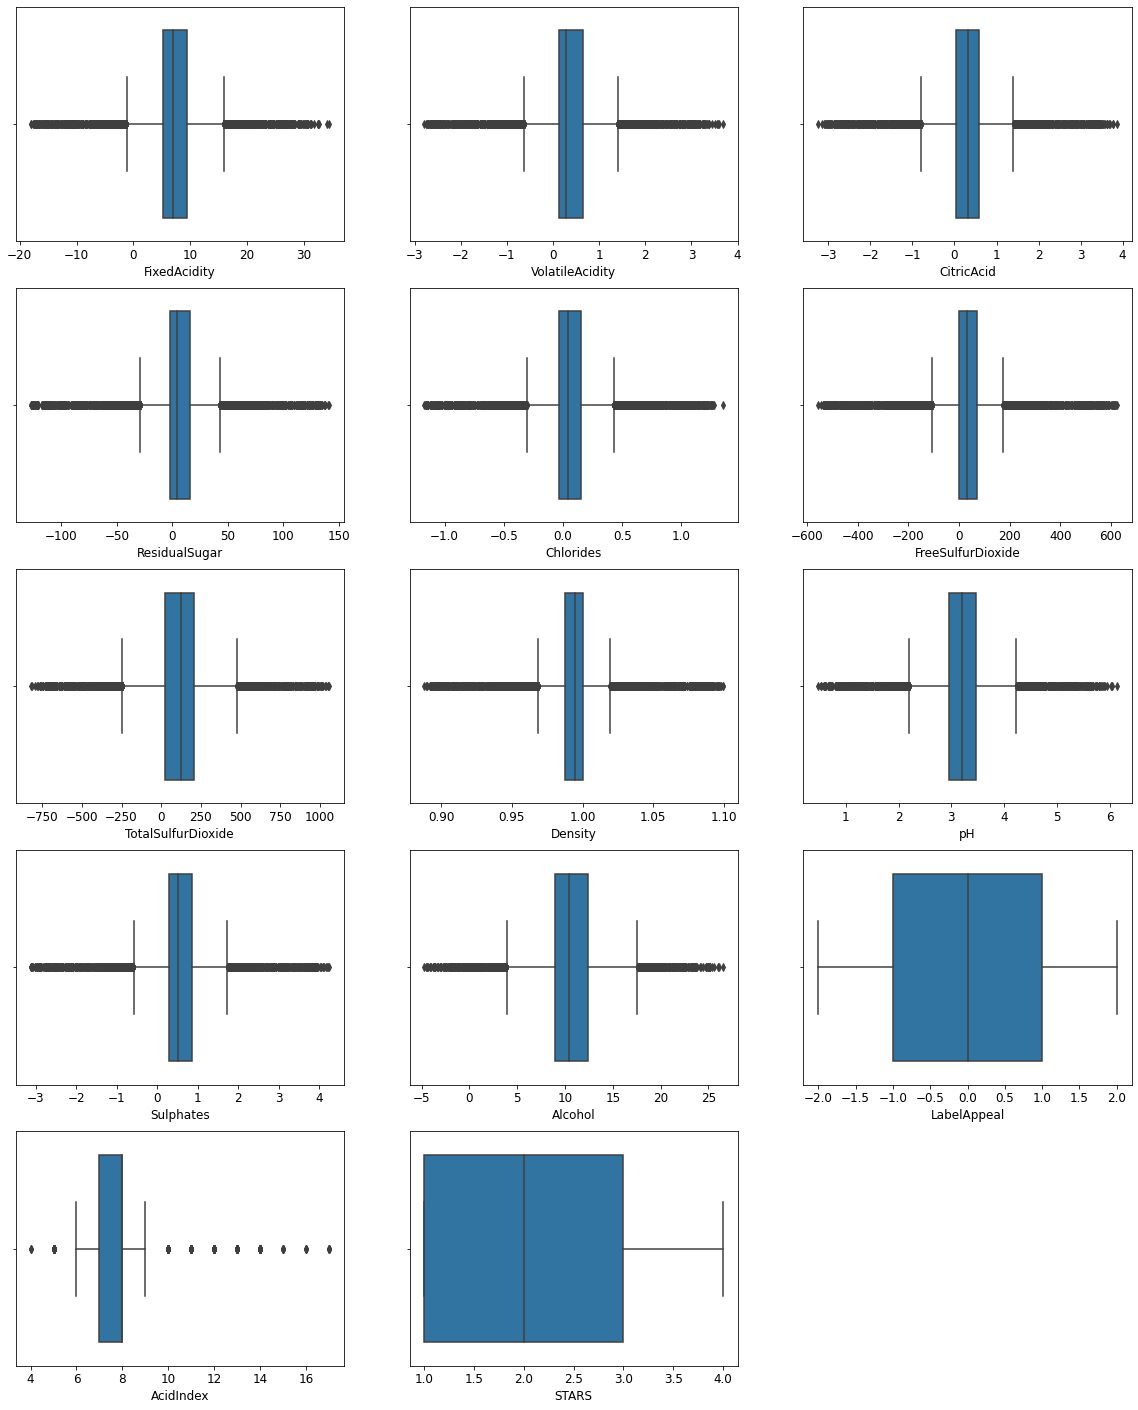

In [ ]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j=1
columns=df.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe
    plt.subplot(5,3,j) 
    sns.boxplot(x=k,data=df)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show()

###**Crosstab**###
We use a crosstab here to consider the results of the most correlated data. The reason we choose this is because LabelAppeal is a subjective marketing score and is easier to frame using the below break up than other artificial means. That is, it is effectively the same as binning and is easier to do.
We do not see any terribly surprising results or "clues" to draw from this.


In [ ]:
#use pandas crosstab to idenity data about the most correlated features
pd.crosstab(df.TARGET,df.LabelAppeal)

LabelAppeal   -2    -1     0     1    2
TARGET                                 
0            102   671  1193   660  108
1            136    89    19     0    0
2            177   755   152     7    0
3             74  1118  1347    70    2
4             14   413  1972   765   13
5              1    88   775  1040  110
6              0     2   155   425  183
7              0     0     4    79   59
8              0     0     0     2   15

#**Make Negative Values the Absolute Value**##
We want to handle the missing values and negative values. In our case we will substitute the negative values with their absolute value. We feel this option may be appropriate as the absolute value of the data are still within the normal range, and none of the values are scaled on the negative end except for the Label Appeal which we will treat differently regardless. For instance, alcohol content cannot be negative, there is no such things. The Label Appeal will just be shifted, as it makes sense for the range from -2,-1,0,1,2 to use.

In [ ]:
#first copy the original data set so that we can perform transformations
absolute=df.copy()

#perform the same transformation on label appeal as above so that we do not have any negative values but do not change the distribution
absolute['LabelAppeal']=df['LabelAppeal']+2

#get the absolute values of the new data frame to get rid of the negative values
absolute=absolute.abs().copy()

#check results
absolute.head()

INDEX  TARGET  FixedAcidity  ...  LabelAppeal  AcidIndex  STARS
0    1.0     3.0           3.2  ...          2.0        8.0    2.0
1    2.0     3.0           4.5  ...          1.0        7.0    3.0
2    4.0     5.0           7.1  ...          1.0        8.0    3.0
3    5.0     3.0           5.7  ...          1.0        6.0    1.0
4    6.0     4.0           8.0  ...          2.0        9.0    2.0

[5 rows x 16 columns]

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


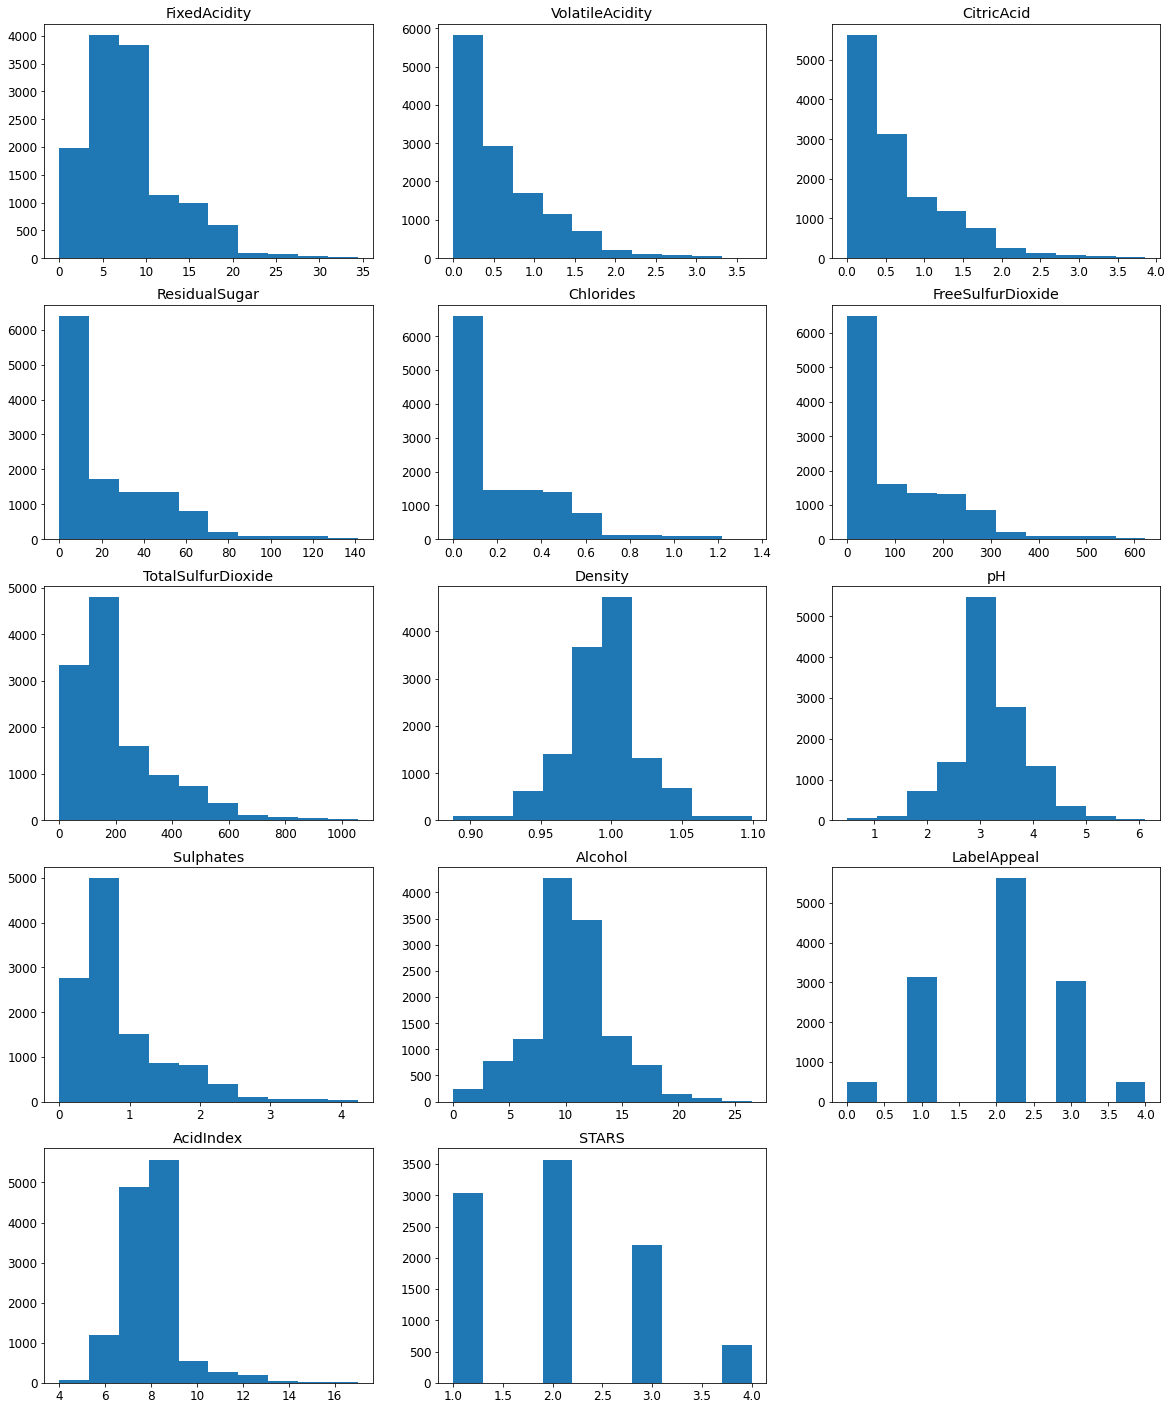

In [ ]:
#next check distributions
#define figure to which we will add the histograms of each variable
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j=1
columns=absolute.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe
    plt.subplot(5,3,j) 
    plt.hist(absolute[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space
#show results    
plt.show()

#**Imputation**#
In order to get rid of our NaNs we will impute. We will use several different types of imputers and see how well they work. Since running so many models against every change will be cumbersome for readers to follow, we will endeavor to alleviate this burden by noting that the below charts put the Bayes model as a fairly central model, being around the median imputation, as per this write up, after said piece de resistance is created below.
Here we check imputations with Bayes, KNN, DecisionTreeRegressor, and ExtraTreesRegressor. As can be seen below (and as was tested for multiple variables - all of which came out with similar results, but there isn't room here for), it is essentially the same whichever imputer we choose.

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


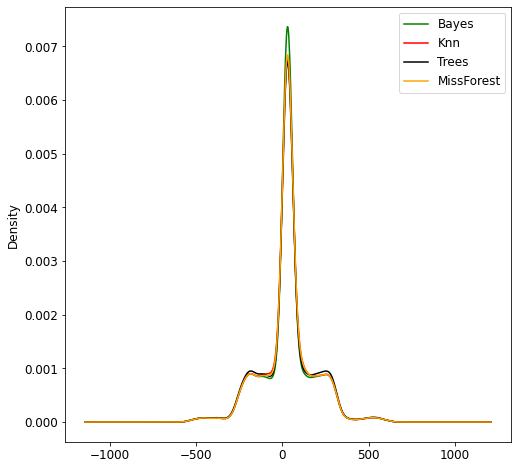

In [ ]:
#Iterative Imputer with Bayes, KNN, DecisionTreeRegressor, ExtraTreesRegressor
#Set up test and training sets
variables = df.columns.values
X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET', axis=1), df['TARGET'], test_size=0.3, random_state=0)

imputer_bayes = IterativeImputer(estimator=BayesianRidge(),max_iter=10,random_state=0)
imputer_knn = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=10, random_state=0)
imputer_nonLin = IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0), max_iter=10, random_state=0)
imputer_missForest = IterativeImputer( estimator=ExtraTreesRegressor(n_estimators=10, random_state=0), max_iter=10, random_state=0)

imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

X_train_bayes = imputer_bayes.transform(X_train)
X_train_knn = imputer_knn.transform(X_train)
X_train_nonLin = imputer_nonLin.transform(X_train)
X_train_missForest = imputer_missForest.transform(X_train)

predictors = [var for var in variables if var !='TARGET']
X_train_bayes = pd.DataFrame(X_train_bayes, columns = predictors)
X_train_knn = pd.DataFrame(X_train_knn, columns = predictors)
X_train_nonLin = pd.DataFrame(X_train_nonLin, columns = predictors)
X_train_missForest = pd.DataFrame(X_train_missForest, columns = predictors)

fig = plt.figure()
ax = fig.add_subplot(111)

X_train_bayes['FreeSulfurDioxide'].plot(kind='kde', ax=ax, color='green')
X_train_knn['FreeSulfurDioxide'].plot(kind='kde', ax=ax, color='red')
X_train_nonLin['FreeSulfurDioxide'].plot(kind='kde', ax=ax, color='black')
X_train_missForest['FreeSulfurDioxide'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels = ['Bayes', 'Knn', 'Trees', 'MissForest']
ax.legend(lines, labels, loc='best')
fig.set_size_inches(8,8)
plt.show()


##**Chi-Square Test**##

We use the chi-square test to see which values have the most importance. We do not use PCA because we have categorical data. Althgouh we could use one-hot key encoding and convert or variables, just as well with binary or dummy varibles, since it will change our data, we will hold off on these techniques.

In [ ]:
#import stats module to perform chi-square
from scipy import stats

#perform chi-square test
target=df['TARGET'].reset_index(drop=True).copy()
chi_sq=[]
for i in range(0,11):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(target, df.iloc[:,i]))[0:2],i])
#chi_sq
chi_sq.sort(reverse=True)
chi_sq

[[(102360.00000000001, 0.4923587960527591), 0],
 [(102360.0, 0.0), 1],
 [(49211.86192444521, 8.867774317148731e-09), 9],
 [(16641.88038815329, 0.42487827774711323), 5],
 [(13061.16005995483, 0.9257128173859965), 6],
 [(12991.49628943964, 5.2427574815416166e-39), 8],
 [(8671.287559965367, 5.934696397666102e-08), 7],
 [(6606.788071637128, 0.2025863456236162), 3],
 [(5271.993533711755, 2.1716282814730722e-06), 4],
 [(4130.26316403747, 0.035563644115428256), 10],
 [(3753.814614764633, 0.4885757969597993), 2]]

We see from the above that while the first three columns are very important, the next three could be grouped as important as well. It is the last five columns here (7,3,4,10,2) that we will have to assess. Of course, column 2, which is our target, is going to be part of the analysis either way.

##**Layered Model Weakness**##

[As stated](https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/), to correctly apply nearest neighbor missing data imputation and avoid data leakage, it is required that the models are calculated for each column are calculated on the training dataset only, then applied to the train and test sets for each fold in the dataset.

This can be achieved by creating a modeling pipeline where the first step is the nearest neighbor imputation, then the second step is the model. This can be achieved using the Pipeline class.

For example, the Pipeline below uses a KNNImputer with the default strategy, followed by a random forest model. One interesting point to note is that for some reason this is far weaker than the KNN imputation we did above. Although it would be easier for me to leave this out and ignore it, I still would like to point out the significant weakness when these two methods are used together versus the earlier implied imputation technique. Again, while I could just as easily skip this, instead I lay out below what all the knn possibile neighbors are, all of which, even up to 16 datat points give a fairly weak understanding of the data with this imputation. I think the major problem here is that both sulphates and stars are missing so much data that there is bound to be a significant shortcoming in many different approaches.

1. 0.419 (0.012)
2. 0.437 (0.012)
3. 0.446 (0.010)
4. 0.452 (0.012)
5. 0.456 (0.013)
6. 0.461 (0.010)
7. 0.460 (0.012)
8. 0.463 (0.010)
9. 0.462 (0.011)
10. 0.463 (0.011)
11. 0.462 (0.011)
12. 0.465 (0.012)
13. 0.467 (0.008)
14. 0.465 (0.010)
15. 0.468 (0.012)
16. 0.466 (0.013)

In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset

data = df.values
X, y = df.drop('TARGET',1), df['TARGET']
# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.457 (0.012)


>1 0.419 (0.012)
>2 0.437 (0.012)
>3 0.446 (0.010)
>4 0.452 (0.012)
>5 0.456 (0.013)
>6 0.461 (0.010)
>7 0.460 (0.012)
>8 0.463 (0.010)
>9 0.462 (0.011)
>10 0.463 (0.011)
>11 0.462 (0.011)
>12 0.465 (0.012)
>13 0.467 (0.008)
>14 0.465 (0.010)
>15 0.468 (0.012)
>16 0.466 (0.013)


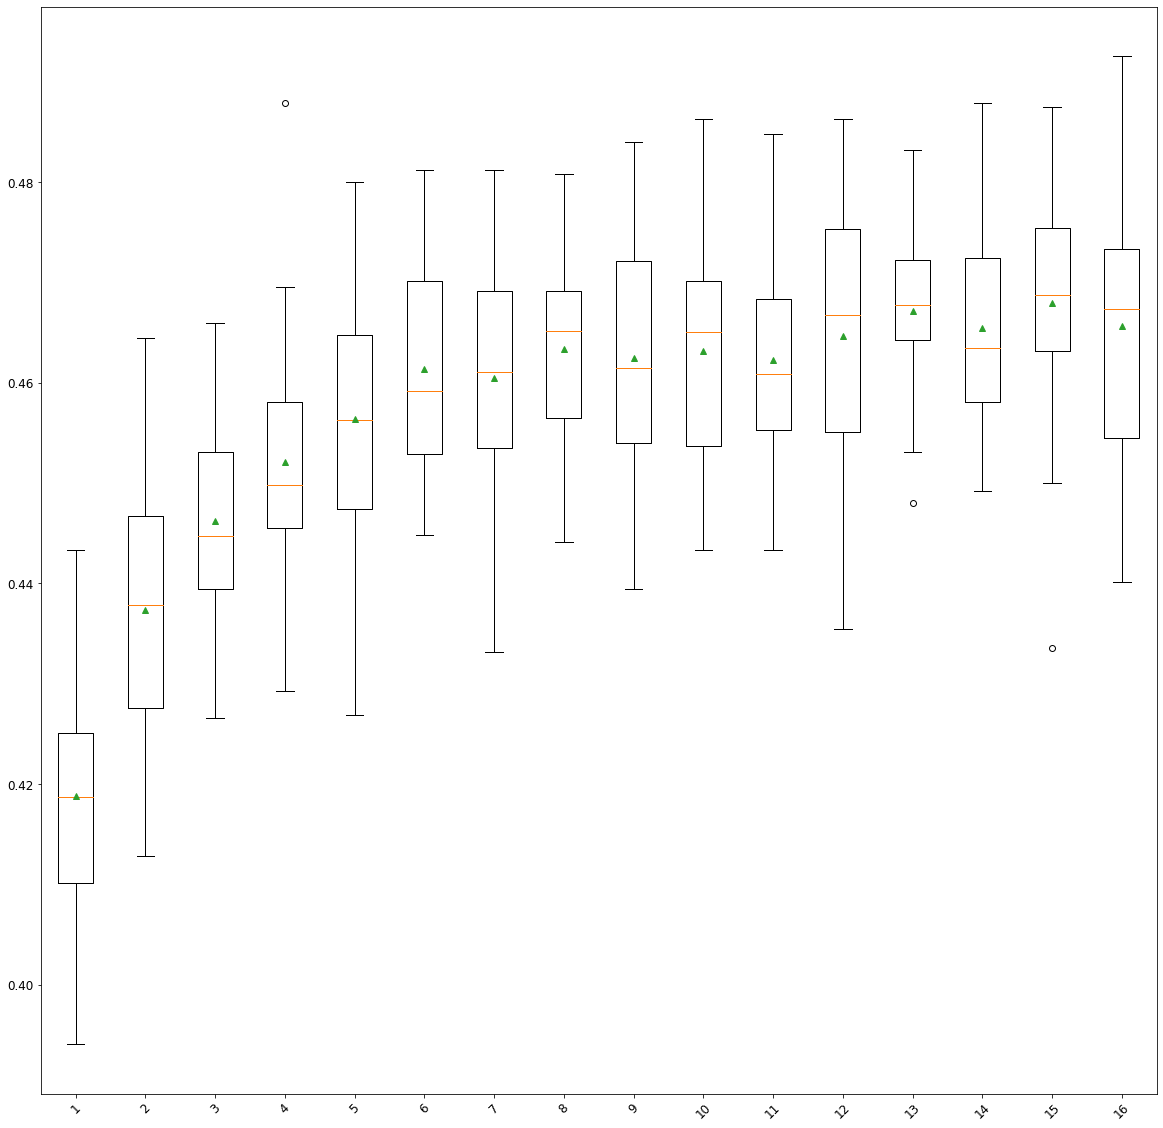

In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [12,16]]
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

##**Iterative Imputation**##

Since our previous method seemed to create a strange misalignment in the data, we are going to test out Iterative Imputation and see our result.

In [ ]:
# import IterativeImputer and enable_iterative_imputer from sklearn library
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# impute missing values
imp = IterativeImputer()
imp.fit(df)
II_df = imp.transform(df)
II_df = pd.DataFrame(II_df, columns=df.columns)
II_df.head()

INDEX  TARGET  FixedAcidity  ...  LabelAppeal  AcidIndex  STARS
0    1.0     3.0           3.2  ...          0.0        8.0    2.0
1    2.0     3.0           4.5  ...         -1.0        7.0    3.0
2    4.0     5.0           7.1  ...         -1.0        8.0    3.0
3    5.0     3.0           5.7  ...         -1.0        6.0    1.0
4    6.0     4.0           8.0  ...          0.0        9.0    2.0

[5 rows x 16 columns]

##**Setting up Our Conversions**##
Here we will be setting up all the steps necessary to test different variations of the data via normalizations, standardizations, getting rid of an imputing means for Nans, etc.

In [ ]:
#Normalized data
a = II_df
TARGET = df['TARGET']
n_df=(a-a.mean())/a.std()
#n_df.drop('TARGET',1,inplace = True)
n_df.head()

INDEX    TARGET  FixedAcidity  ...  LabelAppeal  AcidIndex     STARS
0 -1.732692 -0.015093     -0.613475  ...     0.010174   0.171668  0.182435
1 -1.732477 -0.015093     -0.407702  ...    -1.112048  -0.583661  1.311659
2 -1.732047  1.023131      0.003844  ...    -1.112048   0.171668  1.311659
3 -1.731833 -0.015093     -0.217758  ...    -1.112048  -1.338990 -0.946789
4 -1.731618  0.504019      0.146302  ...     0.010174   0.926997  0.182435

[5 rows x 16 columns]

In [ ]:
#Min-max normalization
b = II_df
mm_df=(b-b.min())/(b.max()-b.min())
mm_df.drop('TARGET',1,inplace = True)
mm_df.head()

INDEX  FixedAcidity  VolatileAcidity  ...  LabelAppeal  AcidIndex     STARS
0  0.000000      0.405714         0.610510  ...         0.50   0.307692  0.390748
1  0.000062      0.430476         0.455951  ...         0.25   0.230769  0.695374
2  0.000186      0.480000         0.839258  ...         0.25   0.307692  0.695374
3  0.000248      0.453333         0.490726  ...         0.25   0.153846  0.086121
4  0.000310      0.497143         0.482226  ...         0.50   0.384615  0.390748

[5 rows x 15 columns]

#**Feature Selection and/or Dimensionality Reduction**#

Now that our data is prepared, we look at some of the regualar techniques to approach optimizing the model via feature selection (unders which we select featuers) or dimensionality reduction (under which we reduce the dimension).  

Throughout our exhaustive research we have applied our domain knolwedge.  We can apply thresholds of normalcy, as stated at the beginning of this report, (within some percentile) bounds and knock out data that does not satisfy our criteria.

We could also use backward or forward selection as well; or we could apply PCA. Since regualr dimensionality reduction techniques such as PCA do not work on categorical data, we will not use PCA. However, we can still apply factor analysis.  To do this we will need to check that we pass the standard tests first though. First we would check that we can pass Bartlett’s Test and Kaiser-Meyer-Olkin Test, otherwise we will not be able to use Factor Analysis. We are following the approach to [DataCamp](https://www.datacamp.com/community/tutorials/introduction-factor-analysis). I tried doing this but Colab did not recognize the factor_analyzer library and for some reason a pip install wasn't solving the issue. As such, we will just use a backward method as below.

Since the forward and backward method should have similar results [here](https://www.researchgate.net/post/Forward_selection_procedure_and_Backward_selection_procedure_in_a_stepwise_regression_analysis), we will stick to just one of them. Also Wikipedia [here](https://en.wikipedia.org/wiki/Stepwise_regression) mentions the following criticism of the method: When estimating the degrees of freedom, the number of the candidate independent variables from the best fit selected may be smaller than the total number of final model variables, causing the fit to appear better than it is when adjusting the R<sup>2</sup> value for the number of degrees of freedom. It is important to consider how many degrees of freedom have been used in the entire model, not just count the number of independent variables in the resulting fit.

After everything is said and done, we will be using our n_df data (the normalized version of our Iterative Imputation).

##**Backward Elimination**##

Here we follow the example found online at [towardsdatascience](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b).  We see from the below that a total of 11 variables were used with a p-value of .05.

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = n_df.drop("TARGET",1)   #Feature Matrix
y = df["TARGET"]            #Target Variable


In [ ]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
be_df = cols
be_df = n_df[be_df]
be_df.head()

VolatileAcidity  CitricAcid  Chlorides  ...  LabelAppeal  AcidIndex     STARS
0         1.066175   -1.494540  -2.003016  ...     0.010174   0.171668  0.182435
1        -0.209312   -1.297342  -1.545596  ...    -1.112048  -0.583661  1.311659
2         2.953895   -1.378541  -0.057369  ...    -1.112048   0.171668  1.311659
3         0.077672   -0.311355  -1.545596  ...    -1.112048  -1.338990 -0.946789
4         0.007520   -1.819336   0.006034  ...     0.010174   0.926997  0.182435

[5 rows x 11 columns]

#**Prepped Data Review**#

Up until now we have explored the data. Initially we checked for missing data and errors. That included finding NaNs and negative numbers as well as outliers, correlation, and the regular statistics.  

We chose to shift some of the data to be positive, take the absolute value of the data that should otherwise be positive as long as the range was reasonable, and to test different methods of imputation. We found that although th KNN method seemed to look fine in the chart, it was only explaining a very small portion of it's intended need. Thus, we used an iterative imputer, normalized our data, and then used backward selection to find the most prominent features based on their p-values. Many of these steps flowed naturally from the data.

We know run another quick EDA to understand what we have and then we will move on to the Regression Modeling.

##**Basic Statistics**##

Here we review the basic statistics of our data.

In [ ]:
pr_df = be_df
a = df['TARGET']
a=(a-a.mean())/a.std()
pr_df['TARGET'] = a
pr_df.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


VolatileAcidity    CitricAcid  ...         STARS        TARGET
count     1.279500e+04  1.279500e+04  ...  1.279500e+04  1.279500e+04
mean     -1.158220e-15 -1.064998e-15  ... -8.422901e-16  5.026590e-17
std       1.000000e+00  1.000000e+00  ...  1.000000e+00  1.000000e+00
min      -3.971999e+00 -4.116107e+00  ... -1.266034e+00 -1.572427e+00
25%      -2.475771e-01 -3.229546e-01  ... -9.467895e-01 -5.342041e-01
50%      -5.625401e-02  1.841290e-03  ...  1.824348e-01 -1.509258e-02
75%       4.029213e-01  3.150374e-01  ...  2.747488e-01  5.040190e-01
max       4.280402e+00  4.119790e+00  ...  2.440883e+00  2.580465e+00

[8 rows x 12 columns]

##**Check for Correlations and Multicollinearity**##

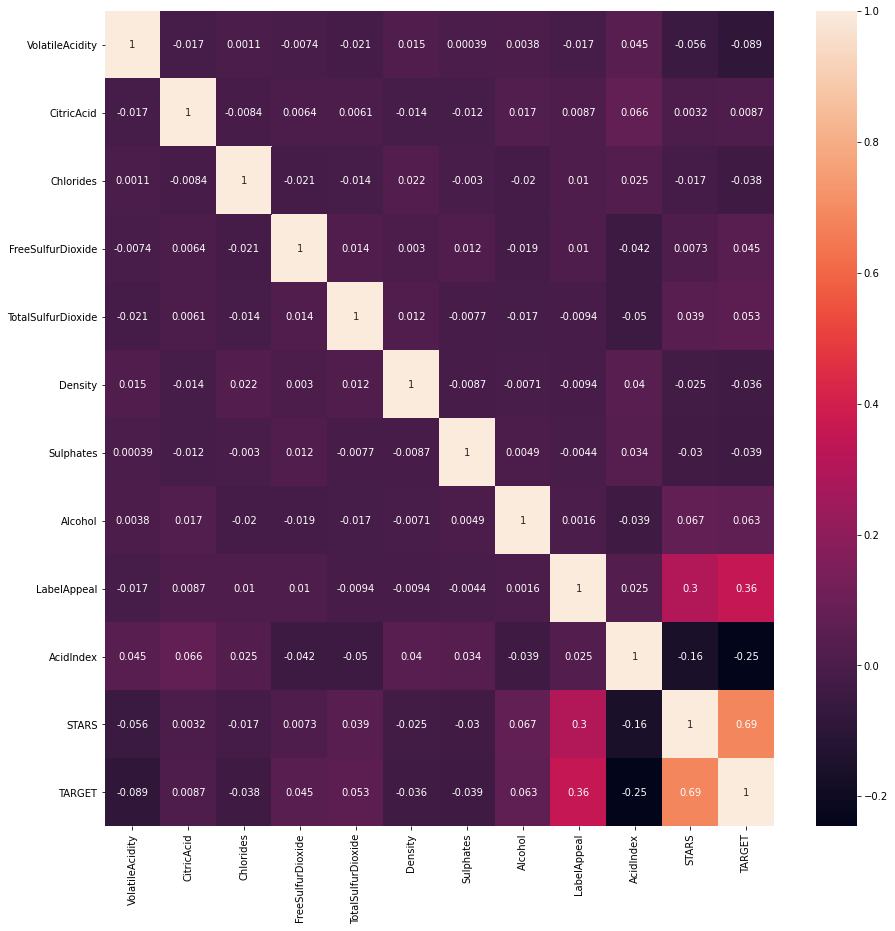

In [ ]:
#Correlation Matrix
corrMatrix = pr_df.corr()

# show visual representation of the correlation matrix
plt.rcParams.update({'font.size': 10,'figure.figsize':(15,15)})
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show() # show plot

We see from the above that the original correlations, although not exactly the same numbers, are still intact throughout our transformation process. That is, Target is still highly correlated with Stars and LabelAppeal, as it was at the beginning of this process. It seems to indicate that we are on the right track.

##**Plots**##


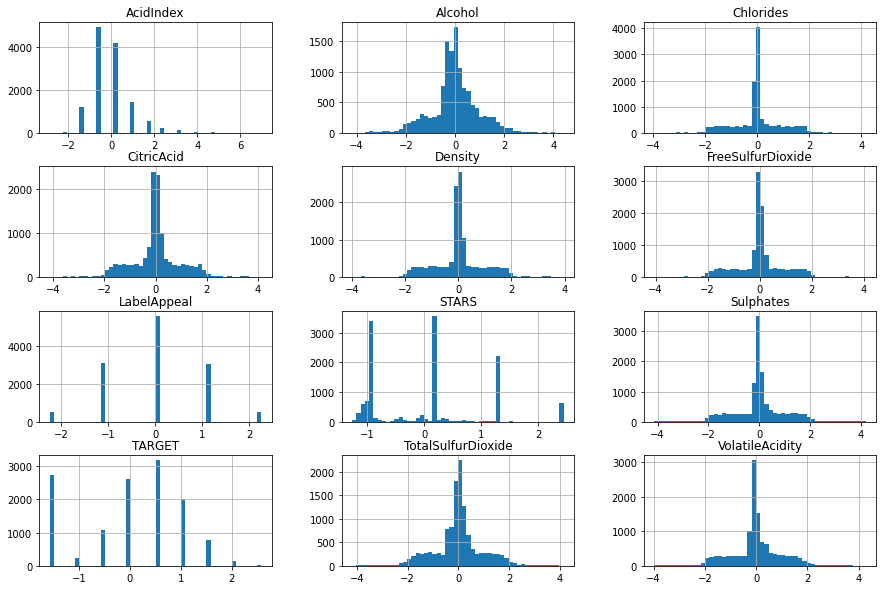

In [ ]:
import matplotlib.pyplot as plt
pr_df.hist(bins=50, figsize=(15,10))
plt.show()

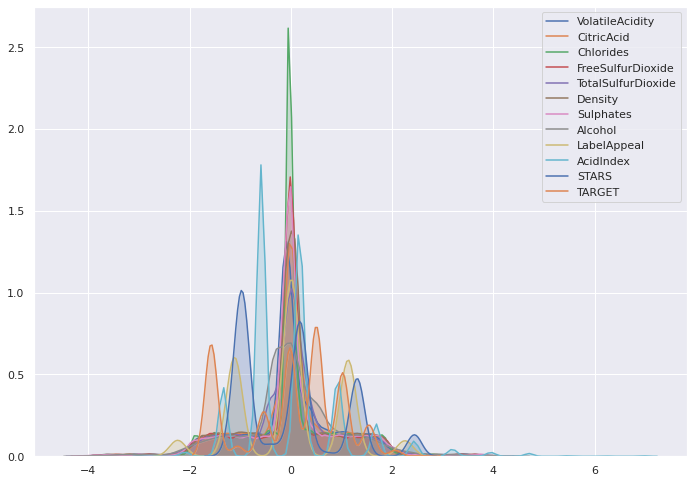

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for col in pr_df:
    sns.kdeplot(pr_df[col], shade=True)

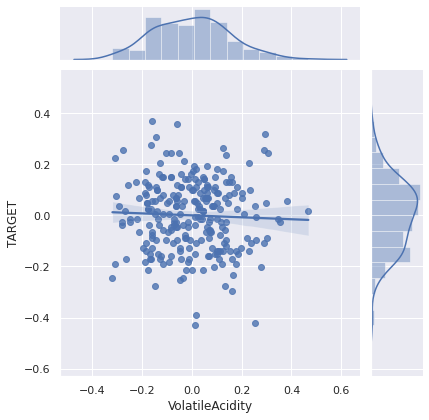

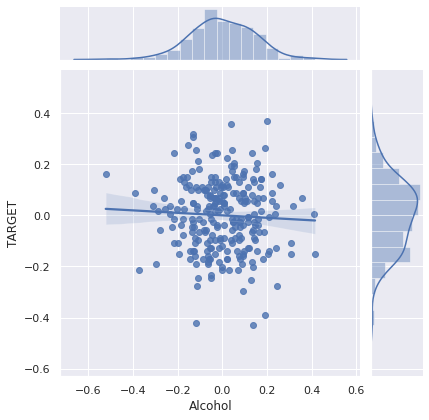

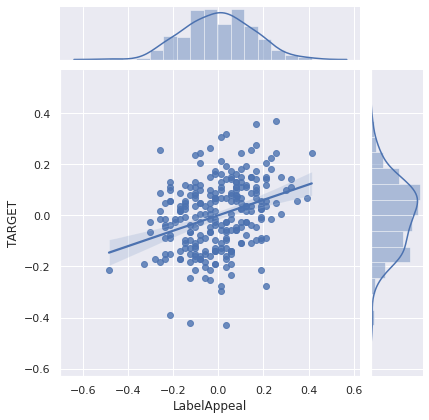

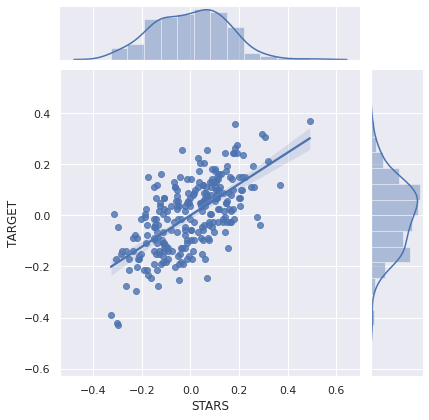

In [ ]:
def scale_It(df,N):
  a = []
  for col in df.columns:
    a.append(df[col].groupby(df[col].index // N).mean())
  scaled_df = pd.DataFrame(a)
  return scaled_df.transpose()

def do_jointplot(df):
  a = sns.jointplot("VolatileAcidity","TARGET",df,kind = "reg")
  b = sns.jointplot("Alcohol","TARGET",df,kind = "reg")
  c= sns.jointplot("LabelAppeal","TARGET",df,kind = "reg")
  d = sns.jointplot("STARS","TARGET",df,kind = "reg")

x = scale_It(pr_df,50)
do_jointplot(x)

We see from the above plots that our upcoming approach to study the variables against a dependent TARGET is a reasonable one. That is, we would like to analyze how we can directly figure out which model best fits the data, since this does display the typical patterns of a distribution, just not a normal one.

In [ ]:
X = pr_df.drop("TARGET",1)   #Feature Matrix
y = pr_df["TARGET"]            #Target Variable

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print("Score:", lr.score(X, y))
print("Coefficients: ", lr.coef_)

Score: 0.5222500857756283
Coefficients:  [-0.04435252  0.01288163 -0.0242929   0.031423    0.02200302 -0.01210778
 -0.0157056   0.01757204  0.17584971 -0.14607453  0.60308045]


In [ ]:
import statsmodels.formula.api as smf

# create a model with the variables chosen for model_1
more_df = pr_df[['STARS','LabelAppeal','AcidIndex','VolatileAcidity','Chlorides','Alcohol']]
major_df = pr_df[['STARS','LabelAppeal','AcidIndex']]

all_df = sm.add_constant(all_df)
major_df=sm.add_constant(major_df)
try1 = sm.OLS(y, major_df)
est_fit = try1.fit()

#print the results
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     4568.
Date:                Mon, 29 Jun 2020   Prob (F-statistic):               0.00
Time:                        03:18:28   Log-Likelihood:                -13496.
No. Observations:               12795   AIC:                         2.700e+04
Df Residuals:                   12791   BIC:                         2.703e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.935e-17      0.006   9.66e-15      

In [ ]:
try2 = sm.OLS(y, all_df)
tryIt = try2.fit()

#print the results
print(tryIt.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.319e+32
Date:                Mon, 29 Jun 2020   Prob (F-statistic):               0.00
Time:                        03:19:28   Log-Likelihood:             4.1631e+05
No. Observations:               12795   AIC:                        -8.326e+05
Df Residuals:                   12782   BIC:                        -8.325e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.537e-16   1.58

In [ ]:
#We evaluate the above models with cross-validation. We use 10-fold CV, because that is standard.
#We evaluate with the negative mean squared error, because, again, it is standard
from sklearn.model_selection import cross_val_score

model = LinearRegression()
output = cross_val_score(model, major_df, y, scoring = "neg_mean_squared_error", cv=10)

#take the square root of the negative of the scores to get the accurate RMSE values
rmse = np.sqrt(-output)
print("RMSE:", rmse)
print("Avg RMSE:", rmse.mean())
print("Stdev RMSE:", rmse.std())

RMSE: [0.71042801 0.68806369 0.70685186 0.69805484 0.68766638 0.6894006
 0.66518485 0.71285617 0.71405176 0.67742857]
Avg RMSE: 0.6949986722892787
Stdev RMSE: 0.015493806205561643


In [ ]:
#We evaluate the above models with cross-validation. We use 10-fold CV, because that is standard.
#We evaluate with the negative mean squared error, because, again, it is standard
from sklearn.model_selection import cross_val_score

model = LinearRegression()
output = cross_val_score(model, all_df, y, scoring = "neg_mean_squared_error", cv=10)

#take the square root of the negative of the scores to get the accurate RMSE values
rmse = np.sqrt(-output)
print("RMSE:", rmse)
print("Avg RMSE:", rmse.mean())
print("Stdev RMSE:", rmse.std())

RMSE: [1.03621732e-15 1.19239326e-15 1.03148812e-15 1.35229785e-15
 1.05183818e-15 9.08026929e-16 1.15152379e-15 7.51939582e-16
 6.94950572e-16 4.96094969e-15]
Avg RMSE: 1.4131625288259983e-15
Stdev RMSE: 1.197255888158695e-15
